# Comprehensive Analysis and Modeling of Portuguese Wine Quality

## Author: Şükrü Deniz Çilek


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

## Inspecting the Red Wine Dataset

In [2]:
red_wine = pd.read_csv("..\\data\\winequality-red.csv", delimiter=";")

print(red_wine.head())

print("Number of Red Wines:", red_wine.shape[0])

print("Number of indicators:", red_wine.shape[1])

print("Number of missing values in the dataset:", red_wine.isnull().sum().sum())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### Descriptive Statistics and Data visualization

In [3]:
print("Unique Wine Count:", red_wine.drop_duplicates().shape[0])

print("Descriptive Statistics")
print(red_wine.describe())

Unique Wine Count: 1359
Descriptive Statistics
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
m

In [4]:
print("Skewness of Data")
print(red_wine.skew())

print("\nKurtosis of Data")
print(red_wine.kurt())

Skewness of Data
fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Kurtosis of Data
fixed acidity            1.132143
volatile acidity         1.225542
citric acid             -0.788998
residual sugar          28.617595
chlorides               41.715787
free sulfur dioxide      2.023562
total sulfur dioxide     3.809824
density                  0.934079
pH                       0.806943
sulphates               11.720251
alcohol                  0.200029
quality                  0.296708
dtype: float64


The wine data shows that the majority of characteristics, such as fixed acidity, volatile acidity, and citric acid, are clustered around their average values with moderate fluctuations, as indicated by their standard deviations. Nevertheless, some factors, such as residual sugar and chlorides, show significant variations, with higher values suggesting possible outliers. The range of alcohol levels, from 8.4 to 14.9, represents a common variety found in wines, with quality ratings centered around an average of 5.64. Significant differences in sulfur dioxide levels and chlorides indicate the varying chemical compositions found in different wines. The dataset contains a diverse range of wine profiles, evident through the mix of stable averages and extreme values.

The dataset's distribution shows variability through skewness and kurtosis values. Features such as residual sugar (4.54) and chlorides (5.68) indicate extreme values due to their high skewness, whereas density and quality appear to be more symmetric. Characteristics like residual sugar and chlorides also demonstrate high kurtosis values (28.62 and 41.72), suggesting the presence of heavy tails. On the other hand, citric acid shows a more uniform distribution with negative kurtosis. These observations emphasize the importance of dealing with unusual data points in specific characteristics for strong analysis. 

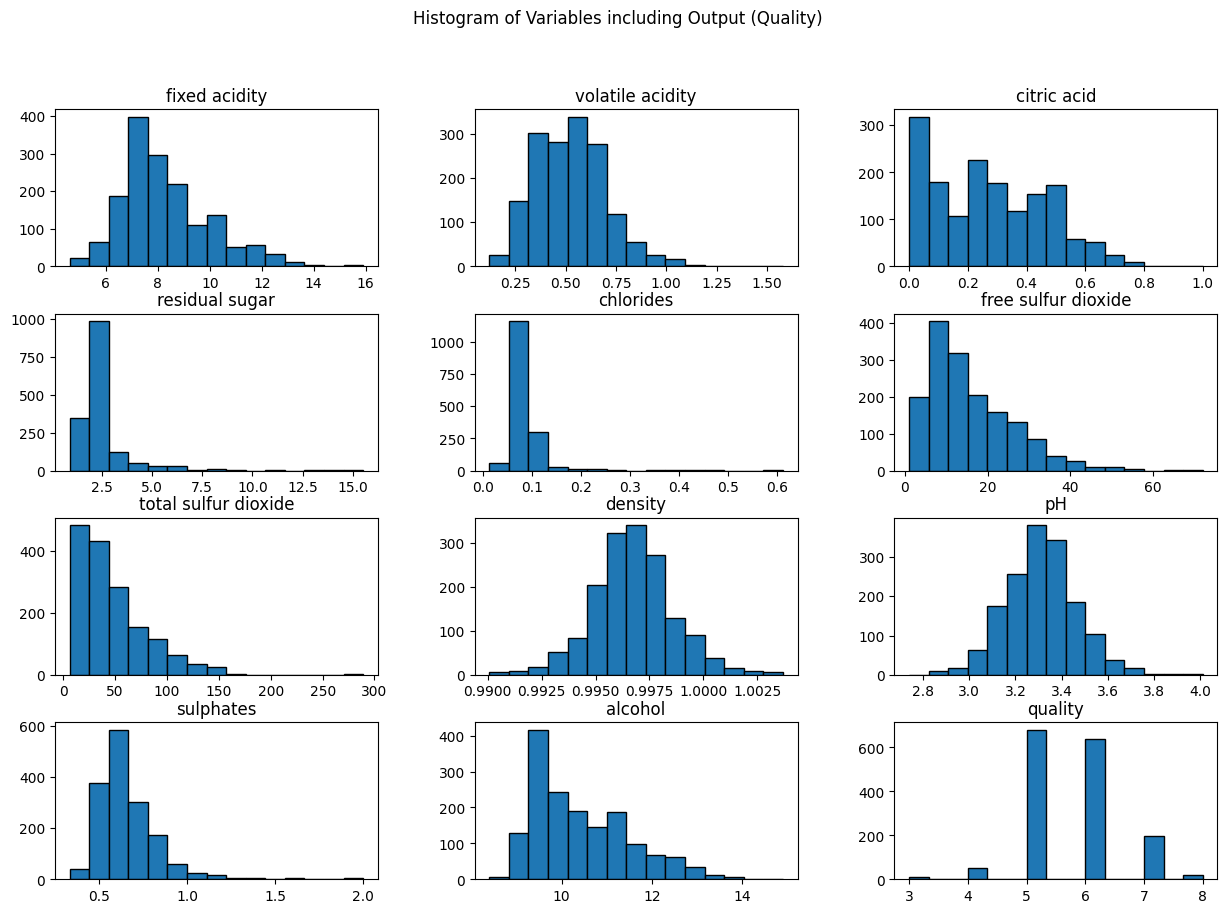

In [5]:
red_wine.hist(bins=15, figsize=(15,10), edgecolor='black', grid=False)
plt.suptitle("Histogram of Variables including Output (Quality)")
plt.show()

In these histogram plots, we can observe the patterns and characteristics highlighted in the descriptive statistics, providing a visual representation of the data distribution and variability.

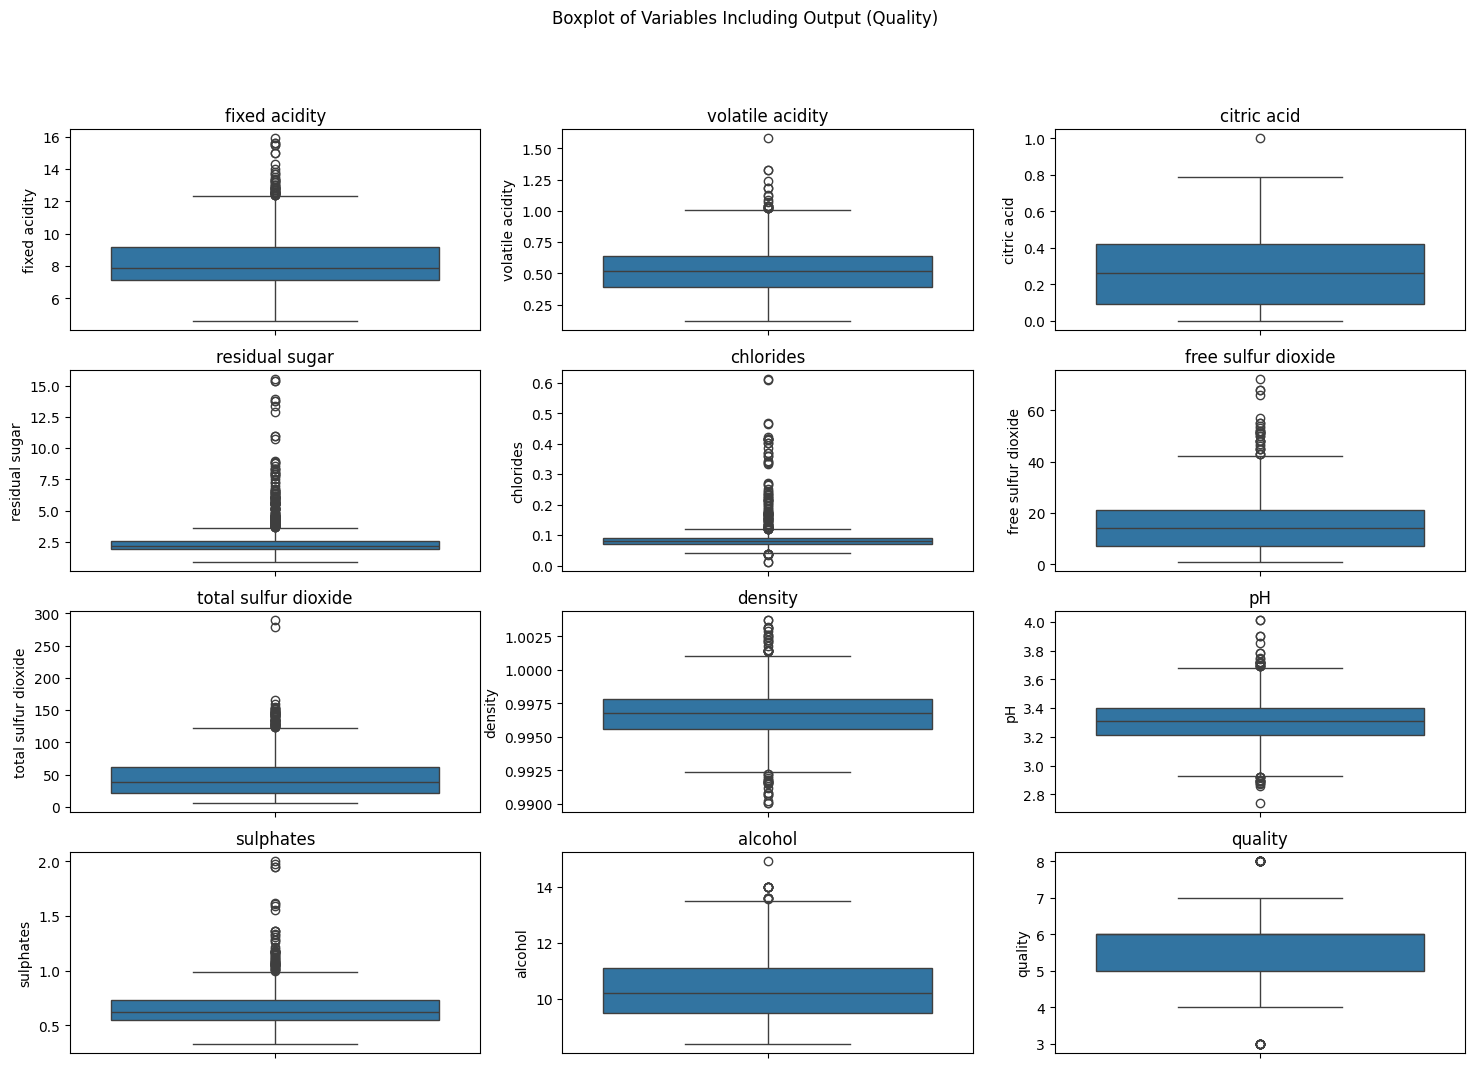

In [6]:
plt.figure(figsize=(18,12))

for i,col in enumerate(red_wine.columns):
    plt.subplot(4,3,i+1)
    sns.boxplot(y=red_wine[col])
    plt.title(col)


plt.suptitle("Boxplot of Variables Including Output (Quality)")
plt.show() 

These boxplots also allow us to visually identify the presence of outliers. As mentioned, variables like chlorides and residual sugar contain a significant number of outliers.

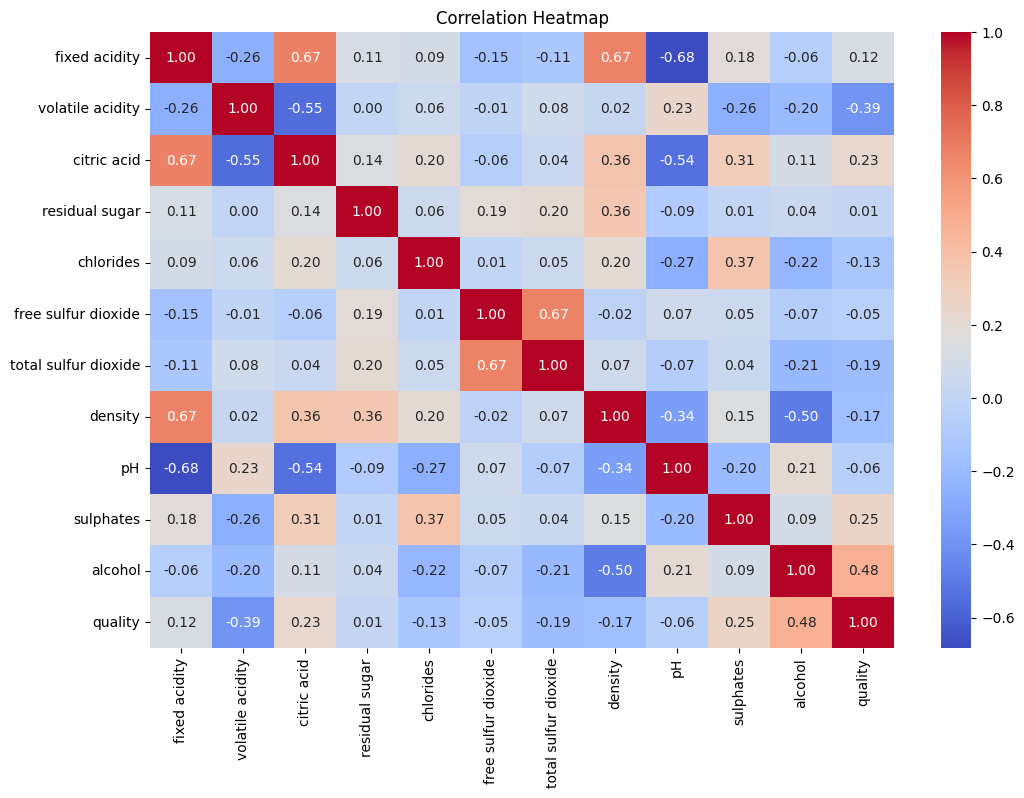

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(red_wine.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In this plot, we created a correlation heatmap to observe the relationships between variables. As seen in the heatmap, the output variable, quality, has the highest positive correlation with alcohol and the strongest negative correlation with volatile acidity. These features likely play a significant role in determining quality. Among the relationships between other features, the strongest positive correlation is observed between fixed acidity and density, as well as fixed acidity and citric acid. On the negative side, fixed acidity and pH exhibit the strongest negative correlation. Apart from these notable relationships, most other correlations are close to zero.

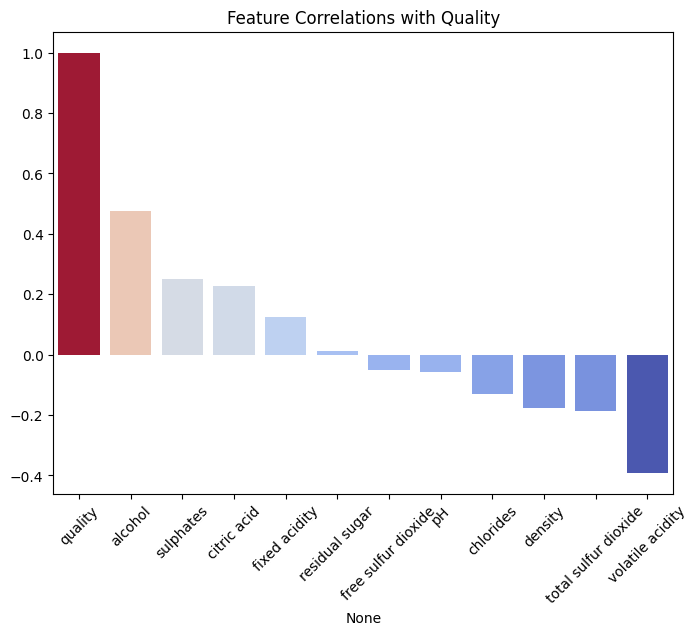

In [8]:
correlations = red_wine.corr()['quality'].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette="coolwarm", hue=correlations.values, legend=False)
plt.xticks(rotation=45)
plt.title("Feature Correlations with Quality")
plt.show()

We can also observe the strongest relationships between our output variable and the features with this bar plot.

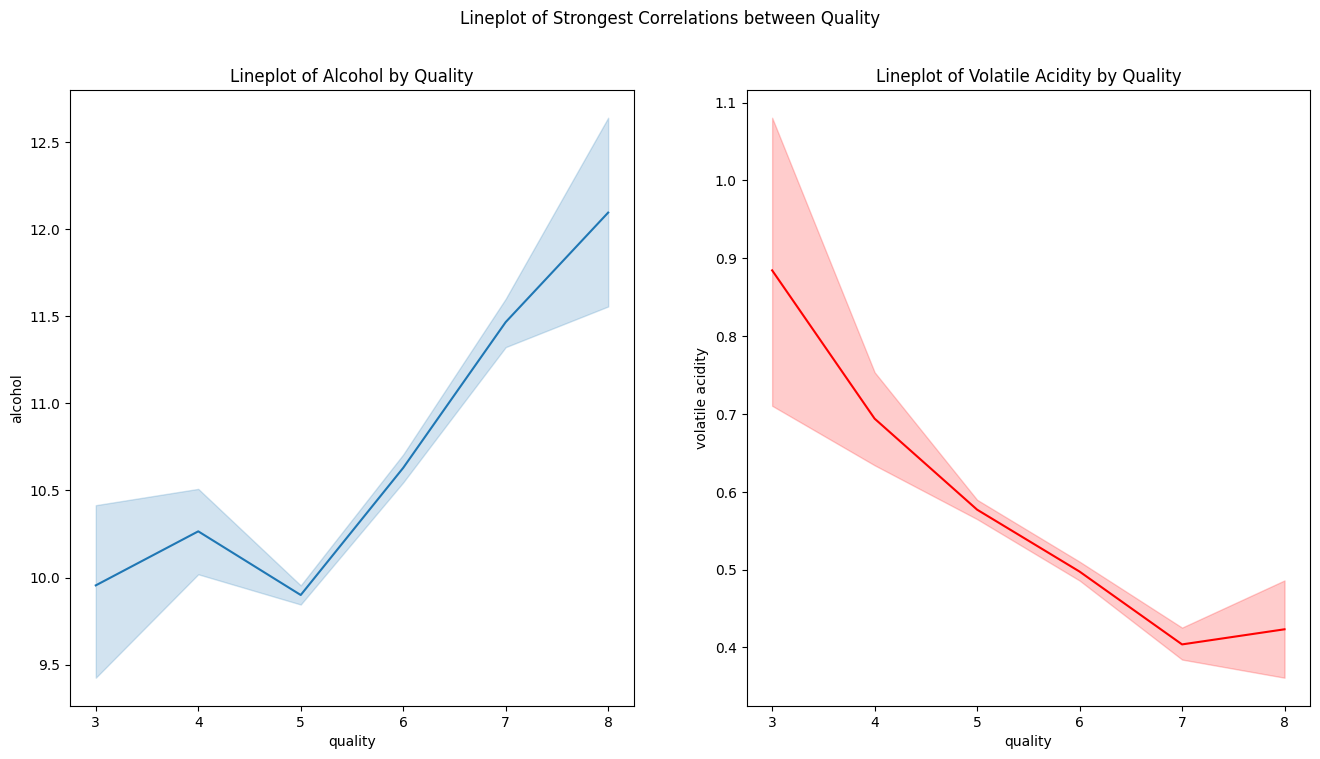

In [9]:
plt.figure(figsize=(16, 8))

plt.subplot(1,2,1)
sns.lineplot(data=red_wine, x="quality", y="alcohol")
plt.title("Lineplot of Alcohol by Quality")

plt.subplot(1,2,2)
sns.lineplot(data=red_wine, x="quality", y="volatile acidity", color='red')
plt.title("Lineplot of Volatile Acidity by Quality")

plt.suptitle("Lineplot of Strongest Correlations between Quality")
plt.show()

These line plots illustrate the features with the highest absolute correlations to quality: volatile acidity and alcohol. From the visualization, we can observe that as alcohol levels increase, quality tends to improve, while a decrease in volatile acidity is associated with an increase in quality.

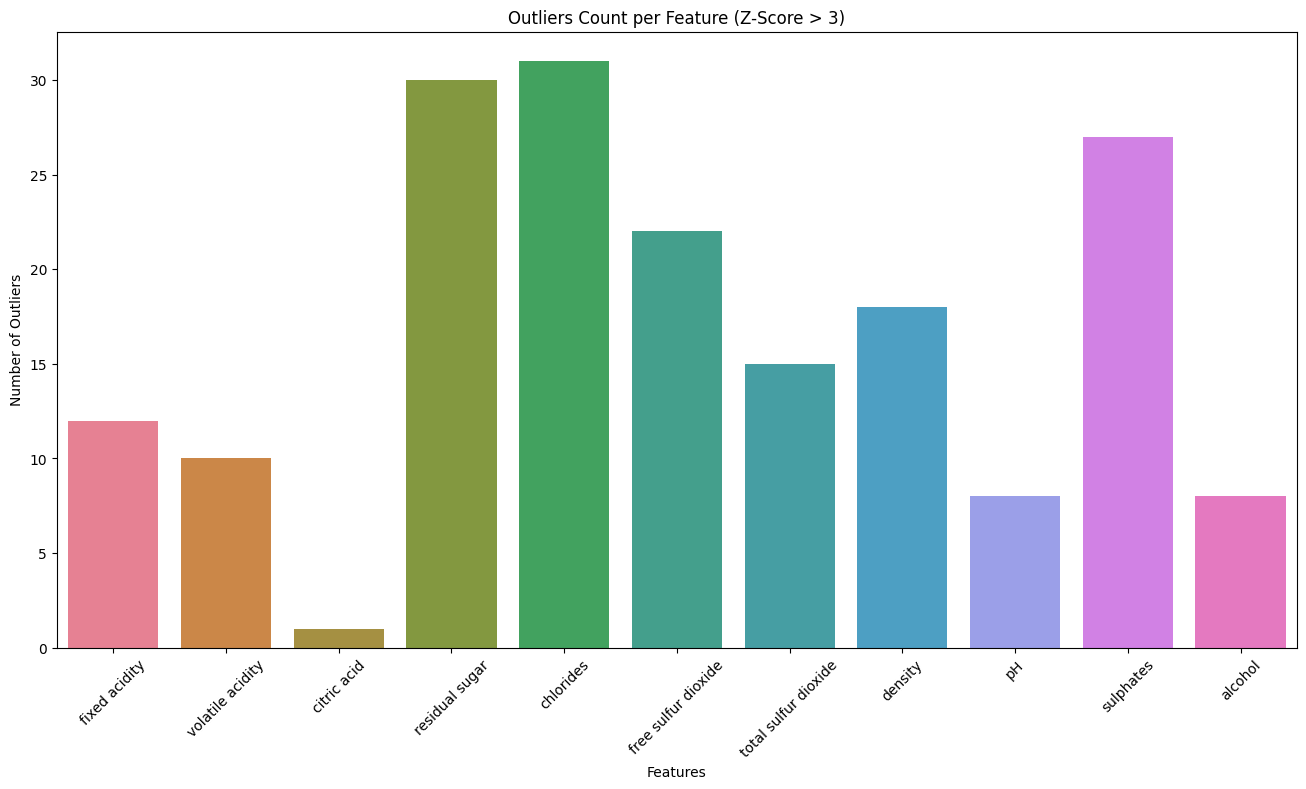

In [10]:
z_scores = red_wine.apply(zscore)
outliers = (z_scores.abs() > 3).sum()

plt.figure(figsize=(16,8))
sns.barplot(x=outliers.index[:-1], y=outliers.values[:-1], hue=outliers.index[:-1], legend=False)
plt.xlabel("Features")
plt.ylabel("Number of Outliers")
plt.title("Outliers Count per Feature (Z-Score > 3)")
plt.xticks(rotation=45)
plt.show()

The table shows how many outliers are in each feature of our dataset, which were found with a Z-score threshold above 3. Chlorides and residual sugar are the features with the highest number of outliers, with 31 and 30 respectively, suggesting noticeable deviations in these aspects. This indicates possible anomalies or outliers, possibly necessitating additional review or intervention. Additional attributes like sulphates, free sulfur dioxide, and density show a significant amount of outliers as well, which could impact the distribution of the dataset and any resulting models. On the other hand, citric acid, pH, and alcohol exhibit fewer outliers, indicating more stable distributions. These extreme values stress the need to carefully handle outliers for strong statistical analysis and model efficacy.


## Inspecting the White Wine Dataset

In [11]:
white_wine = pd.read_csv("winequality-white.csv", delimiter=";")

print(white_wine.head())

print("Number of White Wines:", white_wine.shape[0])

print("Number of indicators:", white_wine.shape[1])

print("Number of missing values in the dataset:", white_wine.isnull().sum().sum())
 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

We observe that the indicators are the same with the red wine dataset.

### T-Test for each Measurements

In [12]:
t_test = {}

for column in red_wine.columns:
    
    t_stat, p_val = ttest_ind(red_wine[column], white_wine[column], equal_var=False)

    t_test[column] = {'t-score' : t_stat, 'p-value' : p_val}

t_test = pd.DataFrame(t_test).T

t_test['Result'] = t_test['p-value'].apply(lambda p: 'Reject H0' if p < 0.01 else 'Fail to Reject H0')

print(t_test)

                        t-score        p-value     Result
fixed acidity         32.422711  5.668161e-183  Reject H0
volatile acidity      53.059093   0.000000e+00  Reject H0
citric acid          -12.228986   3.172970e-33  Reject H0
residual sugar       -47.802237   0.000000e+00  Reject H0
chlorides             34.240211  6.094754e-199  Reject H0
free sulfur dioxide  -54.427948   0.000000e+00  Reject H0
total sulfur dioxide -89.872059   0.000000e+00  Reject H0
density               42.708511   0.000000e+00  Reject H0
pH                    27.775497  2.342265e-149  Reject H0
sulphates             37.055905  1.678842e-231  Reject H0
alcohol               -2.859029   4.277780e-03  Reject H0
quality              -10.149363   8.168349e-24  Reject H0


The p-values for all variables, except alcohol, are significantly less than 0.01, leading us to reject the null hypothesis (H0). This shows that there are notable variations between the red and white wine groups in relation to these measurements. The p-value for alcohol is 0.004, still below 0.01, leading us to reject H0 and indicating a significant variance in alcohol levels among the two wine groups.
The small p-values suggest that the disparities between the red and white wines are very improbable to be a result of random chance. Therefore, we can determine that there are significant differences in the average values of chemical measurements and quality scores between the two wine groups. The t-scores provide additional evidence that the disparities are significant compared to the diversity within each category.

### Comparing Red and White Wine Datasets

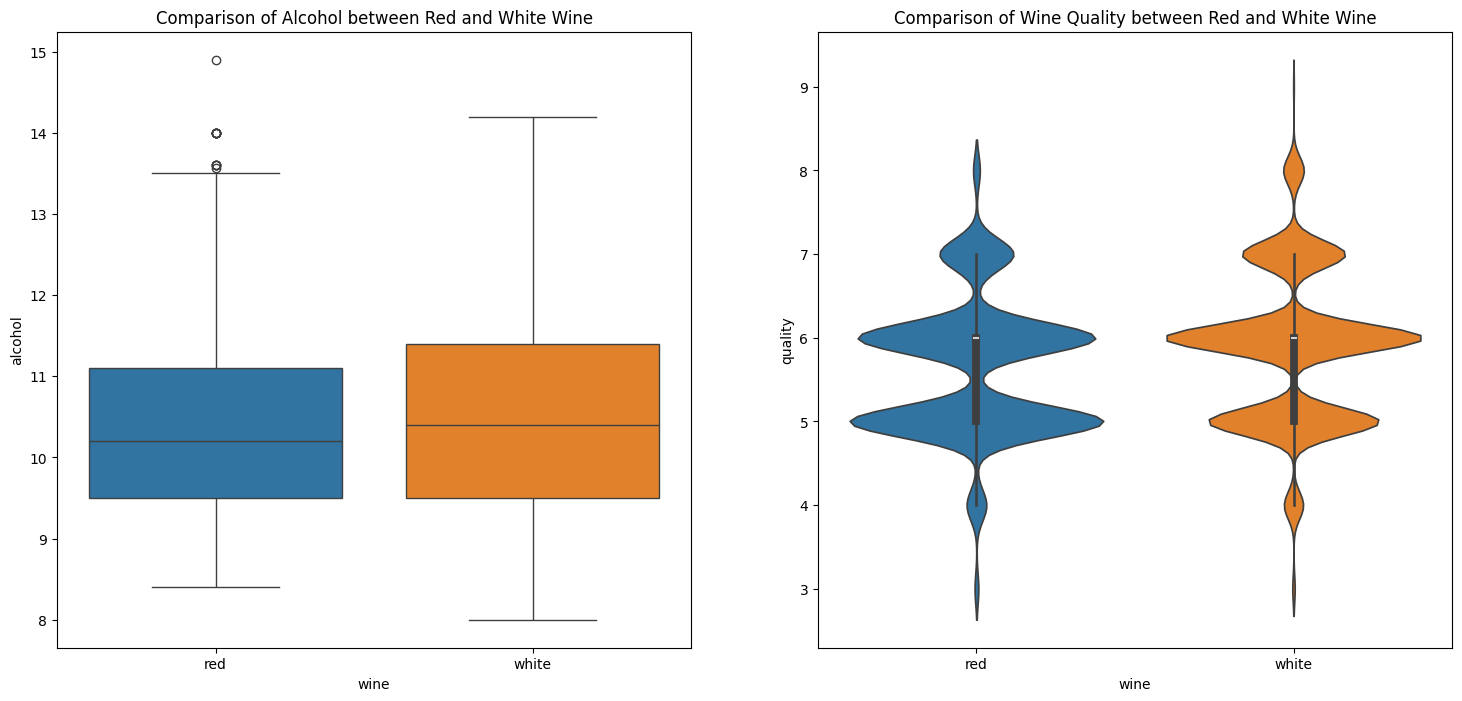

In [13]:
data = pd.concat([red_wine.assign(wine='red'), white_wine.assign(wine='white')])

plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sns.boxplot(x='wine', y='alcohol', data=data, hue='wine')
plt.title("Comparison of Alcohol between Red and White Wine")

plt.subplot(1,2,2)
sns.violinplot(x='wine', y='quality', data=data, hue='wine')
plt.title('Comparison of Wine Quality between Red and White Wine')
plt.show()

We started by comparing the alcohol levels in red and white wines, as alcohol had the highest correlation with quality in the red wine dataset. It can be seen from the data that white wines have higher alcohol content. Furthermore, a similar relationship between alcohol content and quality can be observed in the white wine dataset, as demonstrated by the higher quality scores in the white wine group shown in the violin plot.

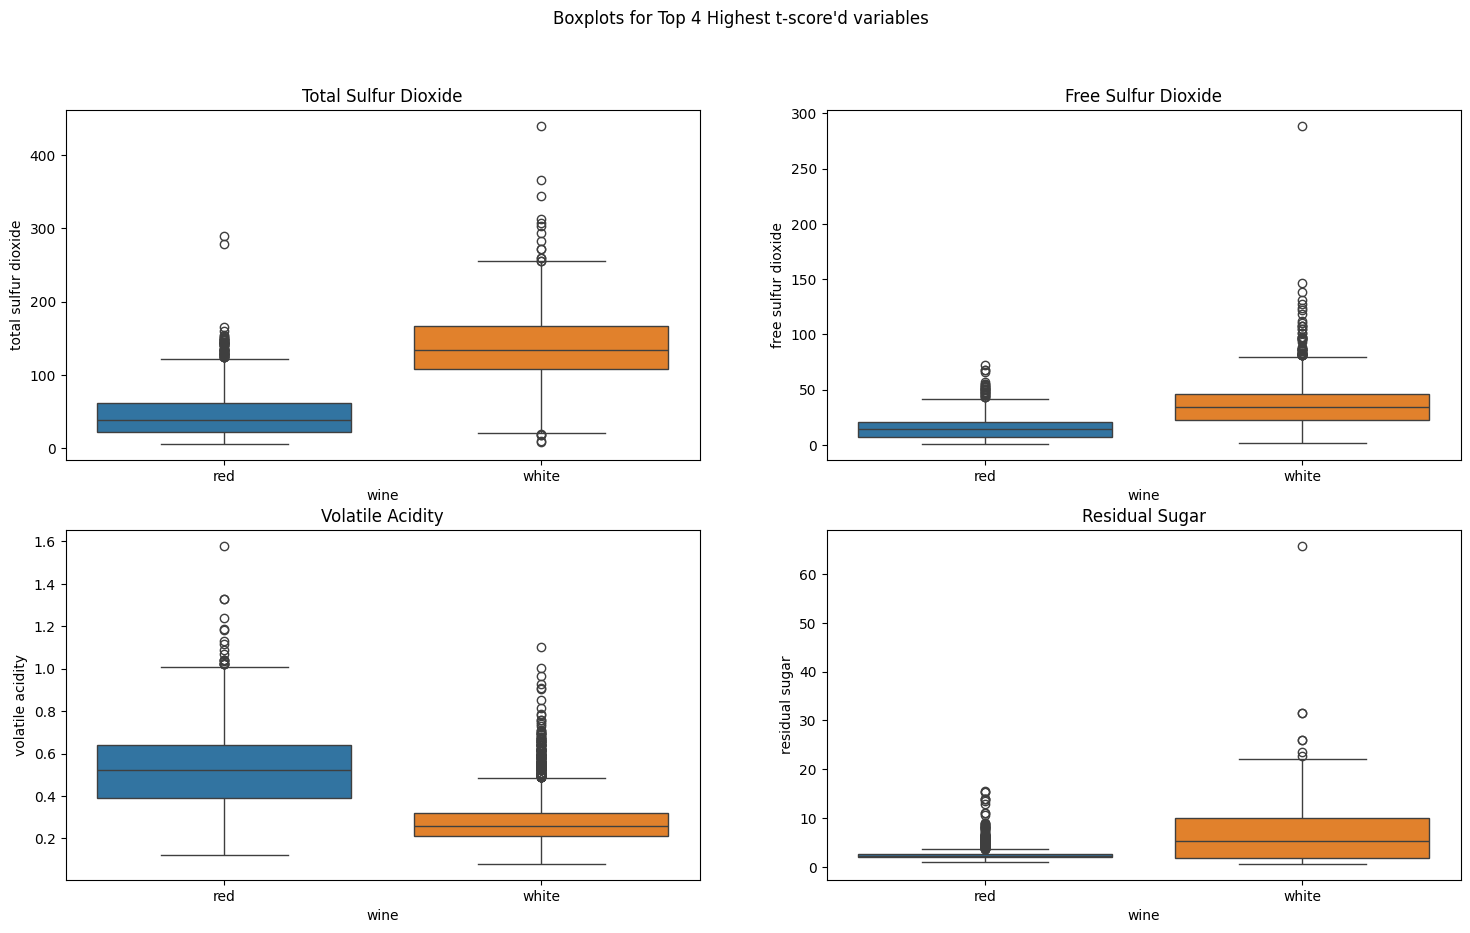

In [14]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.boxplot(x='wine', y='total sulfur dioxide', data=data, hue='wine')
plt.title('Total Sulfur Dioxide')

plt.subplot(2,2,2)
sns.boxplot(x='wine', y='free sulfur dioxide', data=data, hue='wine')
plt.title('Free Sulfur Dioxide')

plt.subplot(2,2,3)
sns.boxplot(x='wine', y='volatile acidity', data=data, hue='wine')
plt.title('Volatile Acidity')

plt.subplot(2,2,4)
sns.boxplot(x='wine', y='residual sugar', data=data, hue='wine')
plt.title('Residual Sugar')

plt.suptitle("Boxplots for Top 4 Highest t-score'd variables")
plt.show()

The boxplots demonstrate distinct variations in volatile acidity, residual sugar, free sulfur dioxide, and total sulfur dioxide between red and white wines, aligned with high t-scores and extremely low p-values. The levels of residual sugar, and sulfur dioxide are significantly higher in white wine and for the volatile acidity is higher in red compared to the other. The variation is deemed to be statistically substantial based on the t-tests results. The differences are emphasized with the two boxplots, which display clear changes in median and spread for each group, validating the t-test findings. 

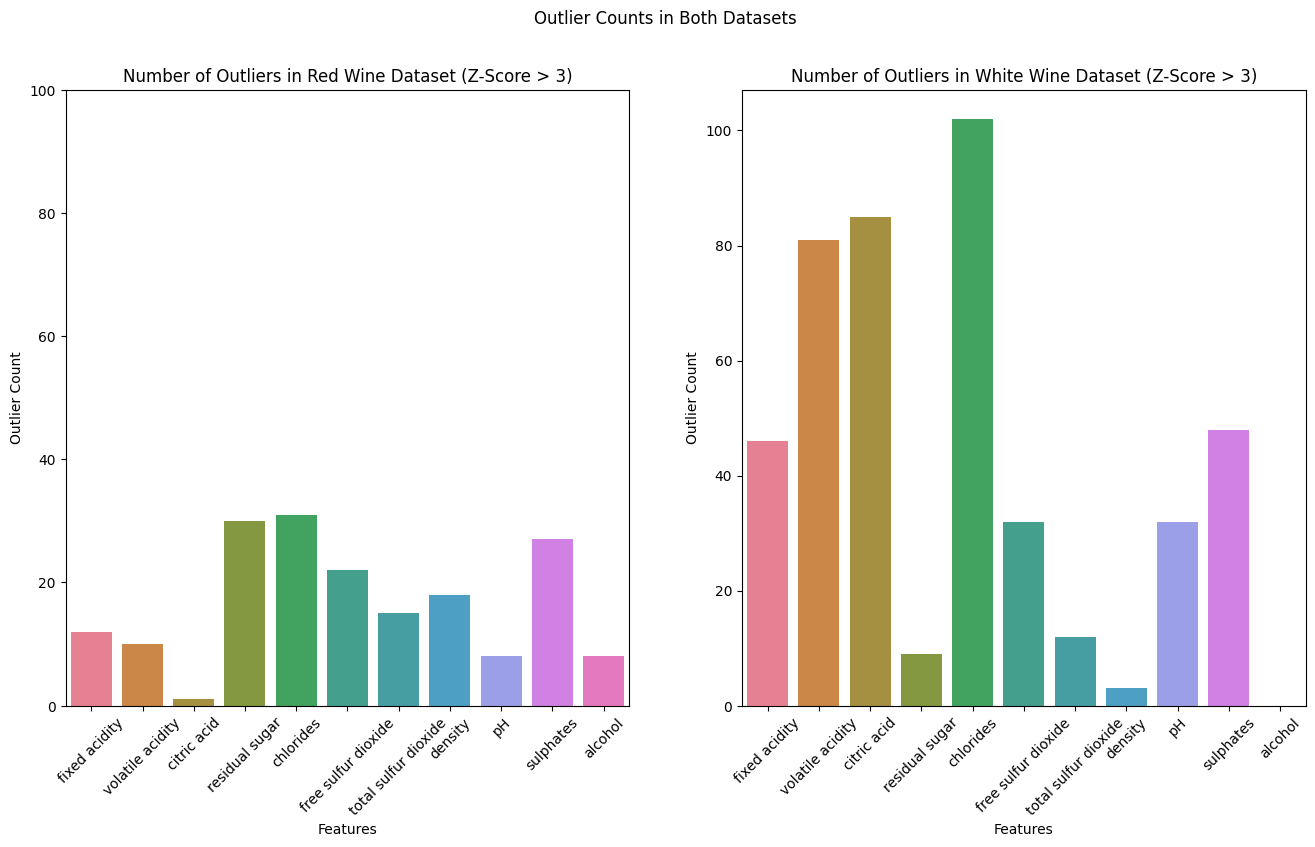

In [15]:
z_scores_white = white_wine.apply(zscore)
outliers_white = (z_scores_white.abs() > 3).sum()

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.barplot(x=outliers.index[:-1], y=outliers.values[:-1], hue=outliers.index[:-1], legend=False)
plt.ylim(0,100)
plt.xlabel("Features")
plt.ylabel("Outlier Count")
plt.title("Number of Outliers in Red Wine Dataset (Z-Score > 3)")
plt.xticks(rotation=45)


plt.subplot(1,2,2)
sns.barplot(x=outliers_white.index[:-1], y=outliers_white.values[:-1], hue=outliers_white.index[:-1], legend=False)
plt.xlabel("Features")
plt.ylabel("Outlier Count")
plt.title("Number of Outliers in White Wine Dataset (Z-Score > 3)")
plt.xticks(rotation=45)

plt.suptitle("Outlier Counts in Both Datasets")
plt.show()

This barplot provides a comparison of the number of outliers found in the red and white wine datasets. As we can observe, the white wine dataset contains a considerably higher number of outliers, especially in variables such as chlorides, citric acid, and volatile acidity. These variables stand out with a notably large number of extreme values, suggesting that they may have higher variability or atypical data points. In contrast, the alcohol variable in the white wine dataset has no outliers, which is interesting considering its potential relationship with quality. The red wine dataset, while also containing outliers, generally has fewer extreme values, especially in comparison to the white wine dataset. This difference could indicate that the white wine dataset may have a broader range of data or inconsistencies that need to be looked into more.

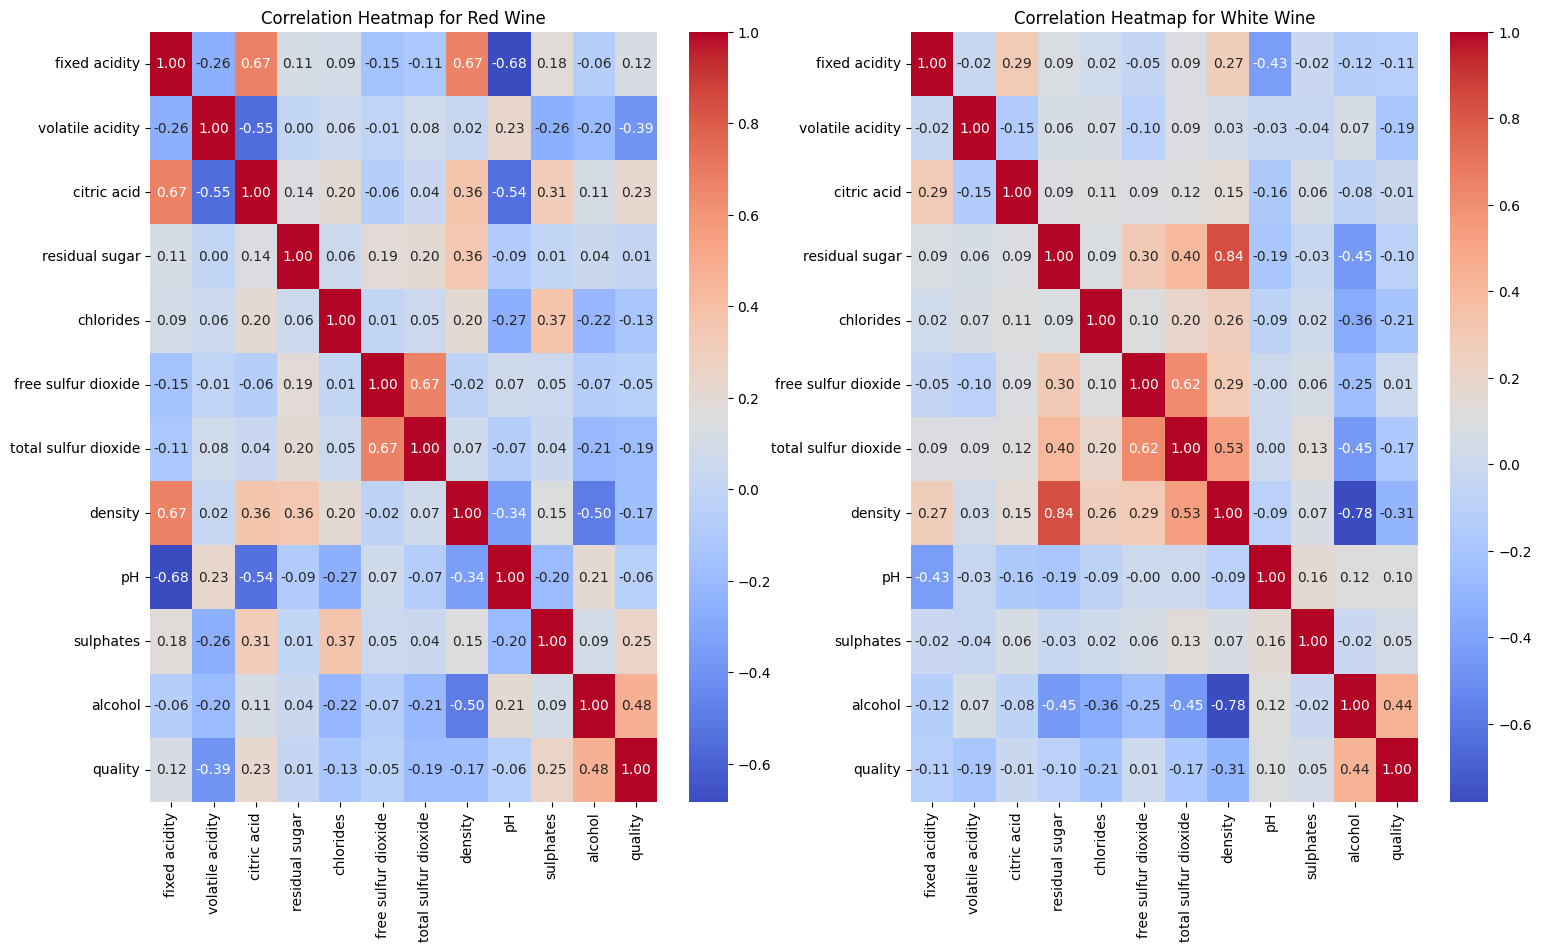

In [16]:
plt.figure(figsize=(18, 10))

plt.subplot(1,2,1)
sns.heatmap(red_wine.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Red Wine")


plt.subplot(1,2,2)
sns.heatmap(white_wine.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for White Wine")
plt.show()


In this section, we compare the correlation heatmaps of the two datasets side by side. As noted in the initial analysis, in the white wine dataset, the variable alcohol continues to show the strongest positive correlation with the output variable, quality. In contrast, the second most significant correlation is observed with density, which shows a moderate negative correlation of -0.31 with quality. When examining the relationships among the input variables, some notable differences emerge between the red and white wine datasets. In the white wine dataset, the strongest positive correlation is found between density and residual sugar, while the most substantial negative correlation exists between alcohol and density. These findings suggest that, in white wine, the variables affecting quality are not only strongly correlated with alcohol but also exhibit intricate interrelationships among the input variables that differ from those observed in the red wine dataset.

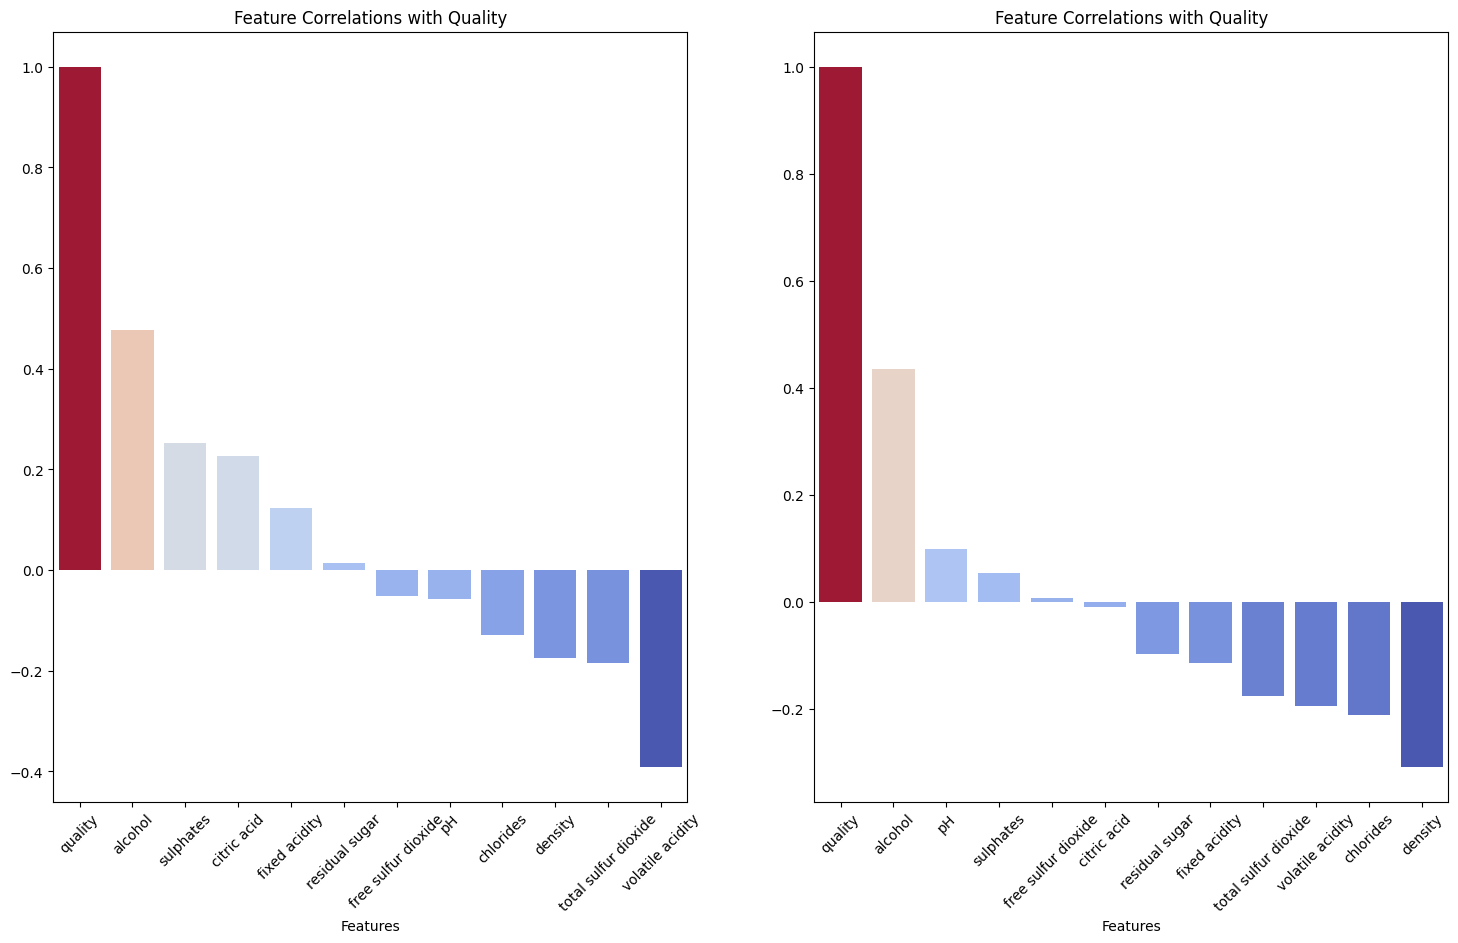

In [17]:
correlations_white = white_wine.corr()['quality'].sort_values(ascending=False)

plt.figure(figsize=(18, 10))

plt.subplot(1,2,1)
sns.barplot(x=correlations.index, y=correlations.values, palette="coolwarm", hue=correlations.values, legend=False)
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.title("Feature Correlations with Quality")

plt.subplot(1,2,2)
sns.barplot(x=correlations_white.index, y=correlations_white.values, palette="coolwarm", hue=correlations_white.values, legend=False)
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.title("Feature Correlations with Quality")
plt.show()

In this section, we visualized the correlations between the input variables and the output variable, quality. As mentioned in the previous section, alcohol shows the strongest positive correlation, while in contrast to the red wine dataset, the white wine dataset demonstrates the strongest negative correlation with the density variable.

### Combining Datasets

In [18]:
data = data.drop(columns=['wine'])

print(data.head())

print("Number of Wines:", data.shape[0])

print("Number of indicators:", data.shape[1])

print("Number of missing values in the dataset:", data.isnull().sum().sum())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

I have previously merged the two datasets to visualize the relationships corresponding to different wine types.

### Strongest Correlated Pairs

In [19]:
correlation_matrix = data.corr(method="pearson")

upper_triangular = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

correlation_pairs = upper_triangular.unstack().dropna()

sorted_pairs = correlation_pairs.abs().sort_values(ascending=False)

top4 = sorted_pairs.head(4)

print("Top 4 strongest correlated pairs")
print(top4)

Top 4 strongest correlated pairs
total sulfur dioxide  free sulfur dioxide    0.720934
alcohol               density                0.686745
density               residual sugar         0.552517
total sulfur dioxide  residual sugar         0.495482
dtype: float64


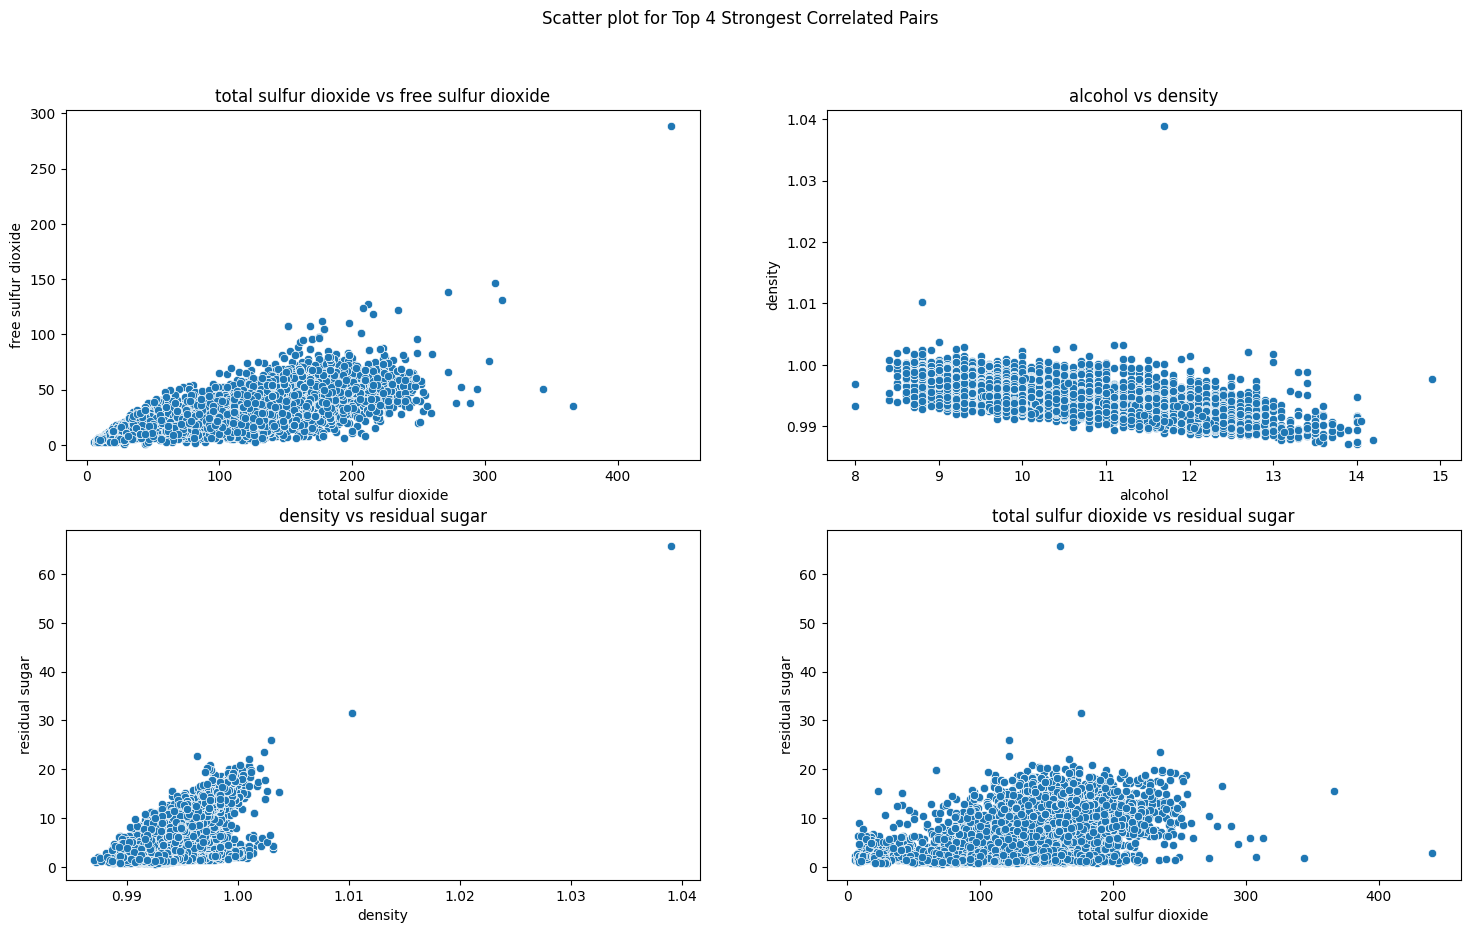

In [20]:
plt.figure(figsize=(18,10))

for i,(var1,var2) in enumerate(top4.index):
    plt.subplot(2,2,i+1)
    sns.scatterplot(data=data, x=var1, y=var2)
    plt.title(f"{var1} vs {var2}")
    
plt.suptitle("Scatter plot for Top 4 Strongest Correlated Pairs")
plt.show()    

The relationships in the scatter plots align with the correlation coefficients. The pairs with higher correlation coefficients, like total sulfur dioxide vs free sulfur dioxide (0.72) and alcohol vs density (0.69), show clear linear trends in the scatter plots, indicating a strong positive relationship. In contrast, the lower correlations, like density vs residual sugar (0.55) and total sulfur dioxide vs residual sugar (0.50), also show a noticeable but weaker linear relationship, consistent with the coefficients. In conclusion, the scatter plots visually confirm the expected trends based on the correlation values.

In [21]:
data['quality_level'] = data['quality'].apply(lambda x: 'GOOD' if x >= 6 else 'POOR')

print(data[['quality', 'quality_level']].head())

   quality quality_level
0        5          POOR
1        5          POOR
2        5          POOR
3        6          GOOD
4        5          POOR


### Splitting Response and predictors

In [22]:
predictors = data.drop(['quality', 'quality_level'], axis=1)
response = data['quality']

predictors_std = (predictors - predictors.mean()) /predictors.std()

print(predictors_std.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.142462          2.188664    -2.192664       -0.744721   0.569914   
1       0.451001          3.281982    -2.192664       -0.597594   1.197883   
2       0.451001          2.553104    -1.917405       -0.660648   1.026618   
3       3.073580         -0.362411     1.660957       -0.744721   0.541370   
4       0.142462          2.188664    -2.192664       -0.744721   0.569914   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -1.100055             -1.446247  1.034913  1.812950   0.193082   
1            -0.311296             -0.862402  0.701432 -0.115064   0.999502   
2            -0.874695             -1.092402  0.768128  0.258100   0.797897   
3            -0.762016             -0.986248  1.101609 -0.363840   0.327485   
4            -1.100055             -1.446247  1.034913  1.812950   0.193082   

    alcohol  
0 -0.915394  
1 -0.580023  
2 -0.580023  


### Linear Regression Model

In [23]:
predictors_std_intercept = sm.add_constant(predictors_std)
predictors_std_intercept.rename(columns={'const': 'intercept'}, inplace=True)

mod = sm.OLS(response,predictors_std_intercept)
res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:44:10   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept                5.8184 

### Forward Selection with AIC 

In [24]:
remaining_predictors = list(predictors_std.columns)
selected_predictors = []
current_score = float('inf')

while remaining_predictors:
    aic_candidates = []

    for predictor in remaining_predictors:
        model = sm.OLS(response, sm.add_constant(predictors_std[selected_predictors + [predictor]]))
        result = model.fit()
        aic_candidates.append((predictor,result.aic))

        aic_candidates.sort(key=lambda x: x[1])
        best_predictor, best_aic = aic_candidates[0]

        if current_score > best_aic:
            remaining_predictors.remove(best_predictor)
            selected_predictors.append(best_predictor)
            current_score = best_aic
        else:
            break

final_model = sm.OLS(response, sm.add_constant(predictors_std[selected_predictors])).fit()

print("Selected predicors with aic:", selected_predictors, current_score)
print(final_model.summary())

Selected predicors with aic: ['fixed acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'volatile acidity', 'free sulfur dioxide', 'pH', 'alcohol', 'residual sugar', 'sulphates', 'density'] 14454.901700233566
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:44:10   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                

Through the forward AIC method used for feature selection, we observe that the AIC score continues to improve as we add more features. In the end, we have obtained the same model that we fitted in part (c). This indicates that the model in part (c) was already optimal in terms of the predictors it included, as the forward selection process did not suggest any additional predictors or remove any of the previously included ones.

### Train and Test Split

In [25]:

X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=101)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (5197, 11), Test set shape: (1300, 11)


### Random Forest Regressor Model and Feature Importances

In [26]:
random_forest_model = RandomForestRegressor(n_estimators=10, random_state=101)
random_forest_model.fit(X_train, y_train)

feature_importances = random_forest_model.feature_importances_

feature_importances = pd.DataFrame({

    'Feature': X_train.columns,
    'Importance': feature_importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                 Feature  Importance
10               alcohol    0.248234
1       volatile acidity    0.133200
5    free sulfur dioxide    0.086925
9              sulphates    0.079276
3         residual sugar    0.076306
6   total sulfur dioxide    0.073279
8                     pH    0.068422
4              chlorides    0.065454
7                density    0.059182
2            citric acid    0.056434
0          fixed acidity    0.053289


In both the linear regression and Random Forest models, alcohol and volatile acidity are key predictors of wine quality, with alcohol positively affecting quality and volatile acidity negatively impacting it. However, the Random Forest model captures more complex, non-linear relationships between predictors and wine quality, while the linear regression model suggests simpler, direct relationships. The importance of other features, such as sulphates and free sulfur dioxide, is more pronounced in the Random Forest model, showing its ability to handle interactions and non-linear effects better than the linear regression model.

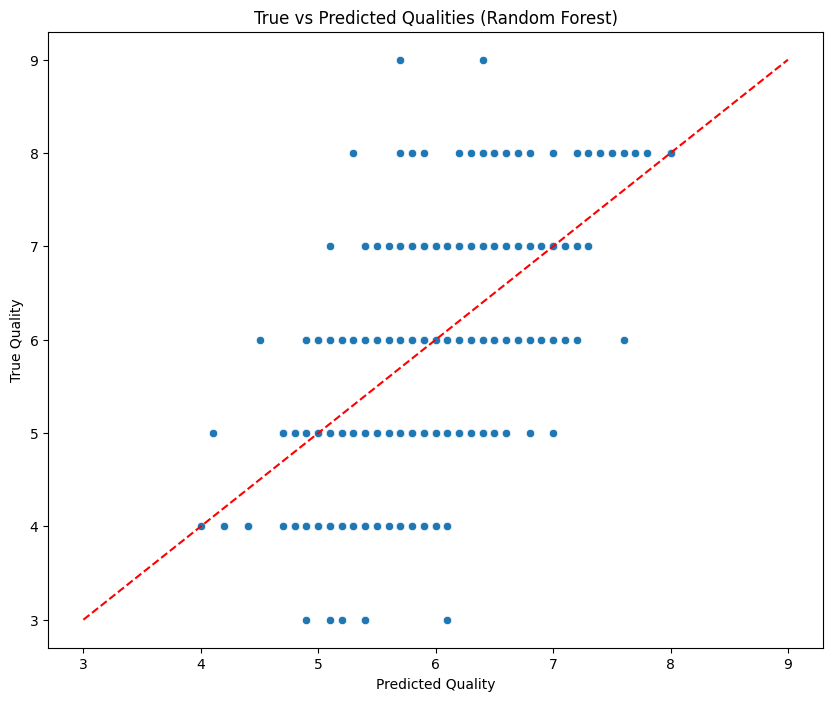

In [27]:
predictions = random_forest_model.predict(X_test)

plt.figure(figsize=(10,8))
sns.scatterplot(x=predictions, y=y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Predicted Quality')
plt.ylabel('True Quality')
plt.title("True vs Predicted Qualities (Random Forest)")
plt.show()

The scatter plot shows the true wine quality values on the y-axis and the predicted values on the x-axis, with a red dashed line indicating perfect predictions where true and predicted values are equal. Most of the blue dots are clustered along horizontal bands, suggesting that the model predicts specific quality scores but with some deviation, but also there are some perfect predictions which intersects with the red dashed line. While the model captures the general trend, there are some discrepancies where the predicted quality differs from the true values, indicating that the model is not perfectly accurate but still provides reasonable predictions.

### Random Forest with different tree numbers

Fitting model with 5000 trees, random state 19...


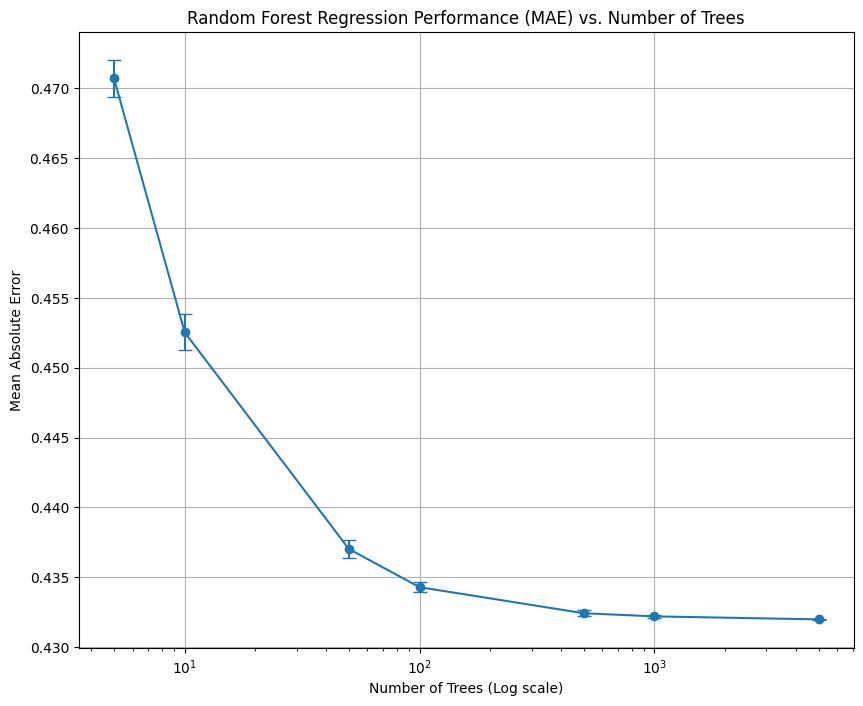

In [29]:
from IPython.display import clear_output

tree_counts = [5, 10, 50, 100, 500, 1000, 5000]

mae_results = []

for n_trees in tree_counts:
    mae_repeats = []
    for i in range (20):
        rf = RandomForestRegressor(n_estimators=n_trees, random_state=i)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mae_repeats.append(mae)
        clear_output(wait=True)
        print(f"Fitting model with {n_trees} trees, random state {i}...")


    mae_results.append(mae_repeats)

mae_means = np.mean(mae_results, axis=1)
mae_std_error = np.std(mae_results, axis=1) / np.sqrt(20)

plt.figure(figsize=(10, 8))
plt.errorbar(tree_counts, mae_means, yerr=mae_std_error, fmt='o-', capsize=5)
plt.xscale('log')
plt.xlabel('Number of Trees (Log scale)')
plt.ylabel('Mean Absolute Error')
plt.title('Random Forest Regression Performance (MAE) vs. Number of Trees')
plt.grid(True)
plt.show()

As the Random Forest model has more trees, the Mean Absolute Error (MAE) decreases, showing better predictive performance. Nevertheless, after reaching 50-100 trees, the enhancement decreases, resulting in limited benefits and consistent predictions as the number of trees increases. This indicates that although having more trees improves performance, the balance between computational expense and accuracy needs to be taken into consider. 

Fitting the model multiple times with different random states ensures that the performance evaluation is not dependent on a single random initialization of the model. Randomness in a random forest model, such as sampling subsets of data and features, can cause slight variations in results. By repeating the process with different random states, we can capture this variability, calculate average performance metrics, and assess the stability of the model. This approach provides a more robust and reliable measure of the model's performance.

### K-Means Clustering with diffferent Cluster Numbers

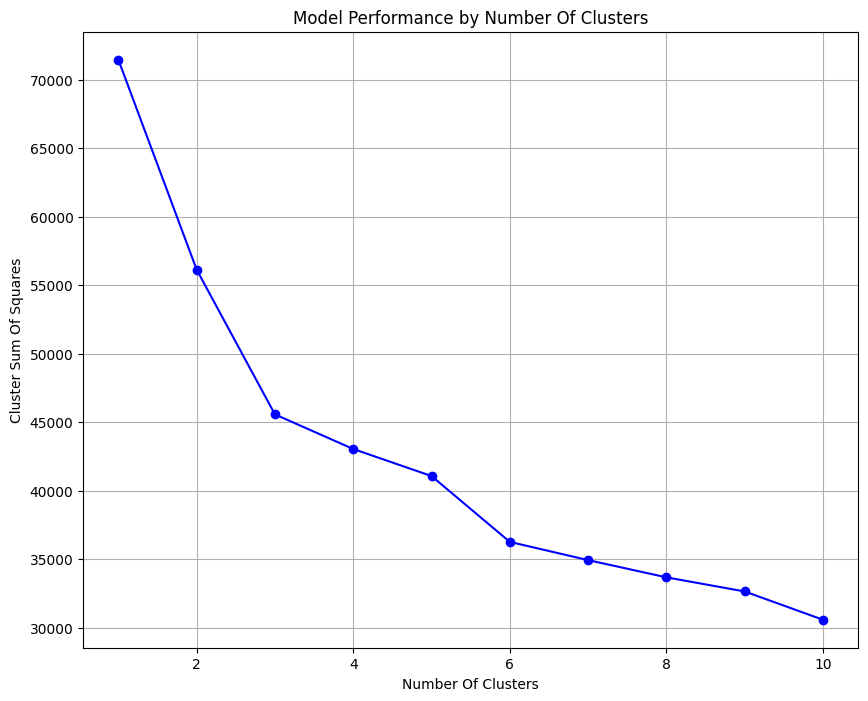

In [28]:
cluster_sum_of_squares = []

for k in range (1,11):
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(predictors_std)
    cluster_sum_of_squares.append(k_means.inertia_)


plt.figure(figsize=(10,8))
plt.plot(range(1,11), cluster_sum_of_squares, marker = 'o', linestyle= '-', color='b')
plt.xlabel("Number Of Clusters")
plt.ylabel("Cluster Sum Of Squares")
plt.title("Model Performance by Number Of Clusters")
plt.grid()
plt.show()

To select the optimal number of clusters for this model, we need to identify the elbow point, which we can observe the point after that the decrase in sum of squares are going to lower. We can see that in the 3 clustered model has the elbow point and after that the decrease become more consistent.

### Model Analysis with the optimal k

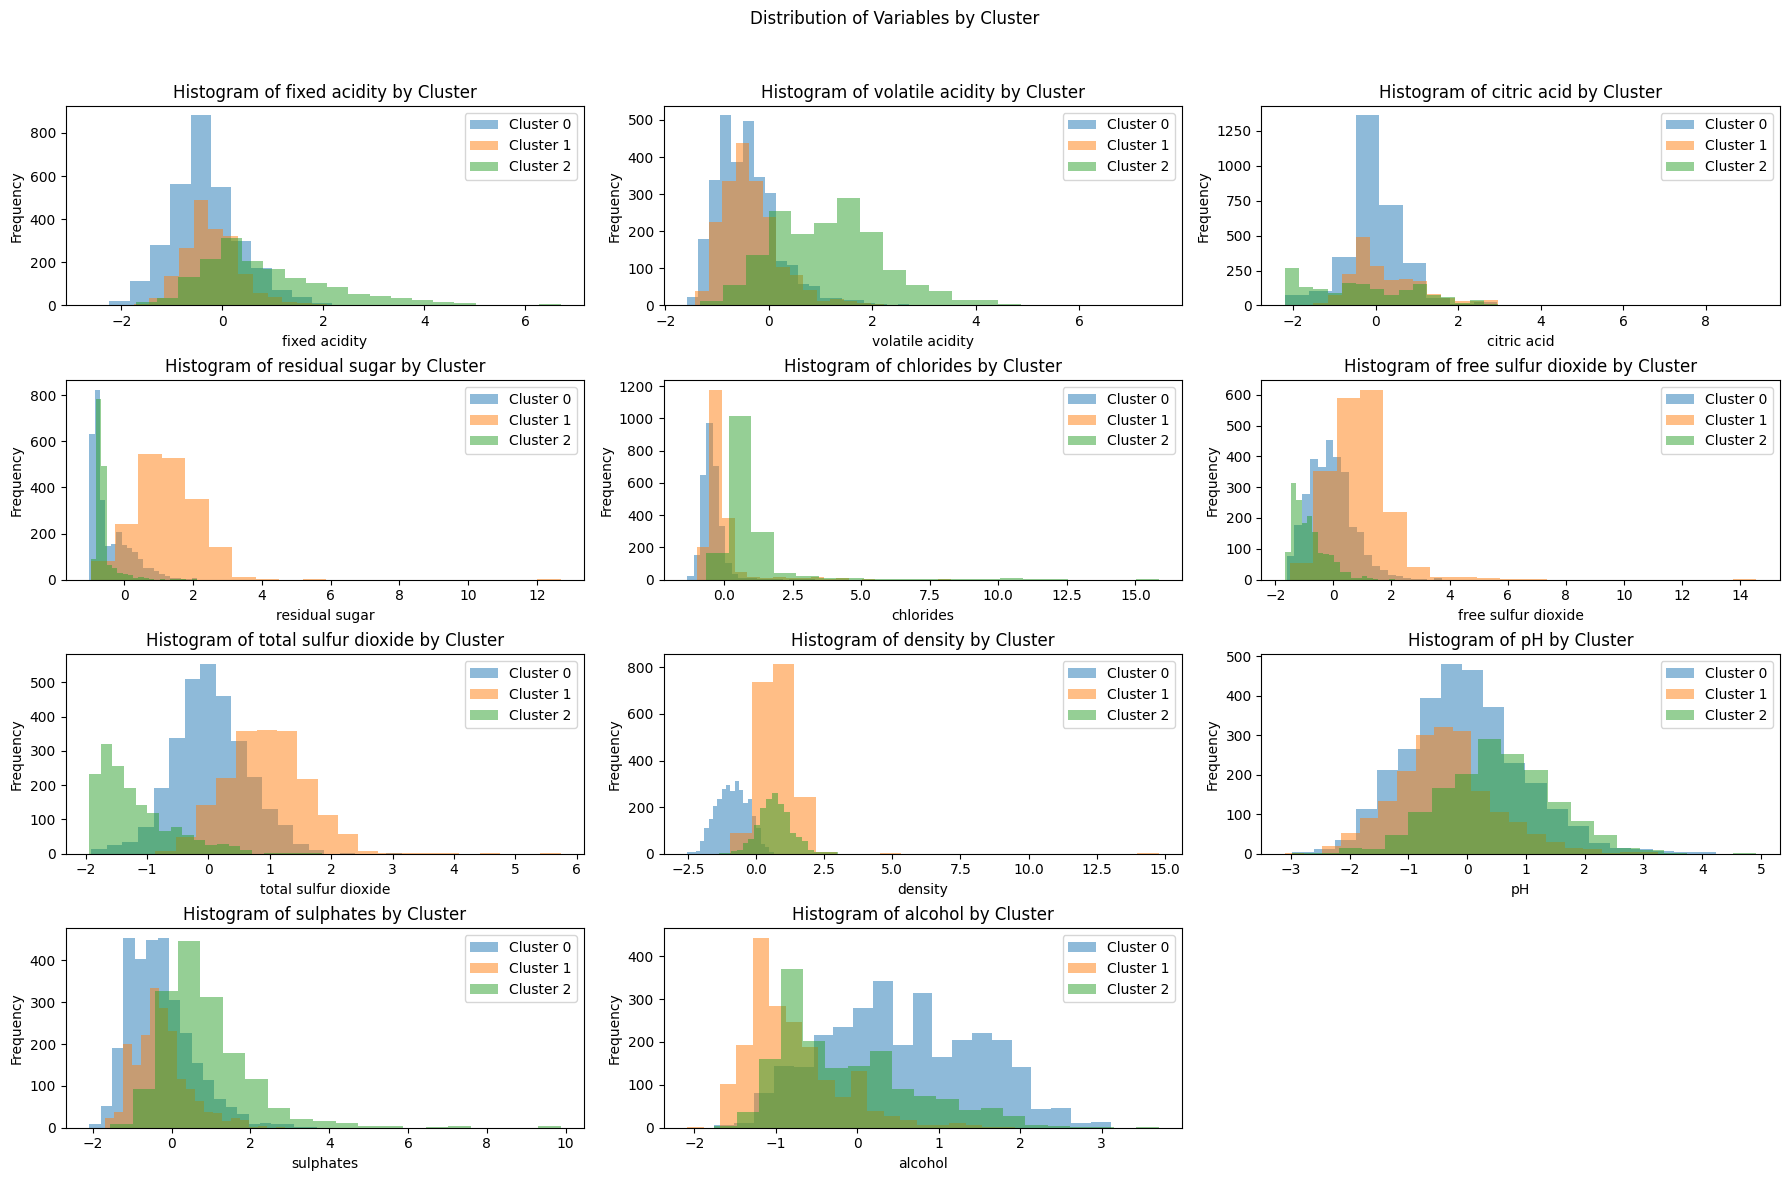

In [55]:
optimal_k = 3

k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(predictors_std)

predictors_std["Cluster"] = k_means.labels_


plt.figure(figsize=(18, 12))

for i,column in enumerate(predictors_std.columns[:-1]):
    plt.subplot(4,3,i+1)
    for cluster in range(optimal_k):
        plt.hist(predictors_std[predictors_std['Cluster'] == cluster][column], bins=20, alpha=0.5, label=f'Cluster {cluster}')
    
    plt.title(f'Histogram of {column} by Cluster')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Distribution of Variables by Cluster")
plt.show()

predictors_std = predictors_std.drop(columns=['Cluster'])

The most discriminatory variables are volatile acidity, residual sugar, total sulfur dioxide, and density. These variables show clear differences between the clusters in their distribution patterns. Volatile acidity and residual sugar have distinct peaks in different clusters, while total sulfur dioxide and density also demonstrate noticeable separations, making these variables key in distinguishing between the groups.

### Most Discriminated Variables

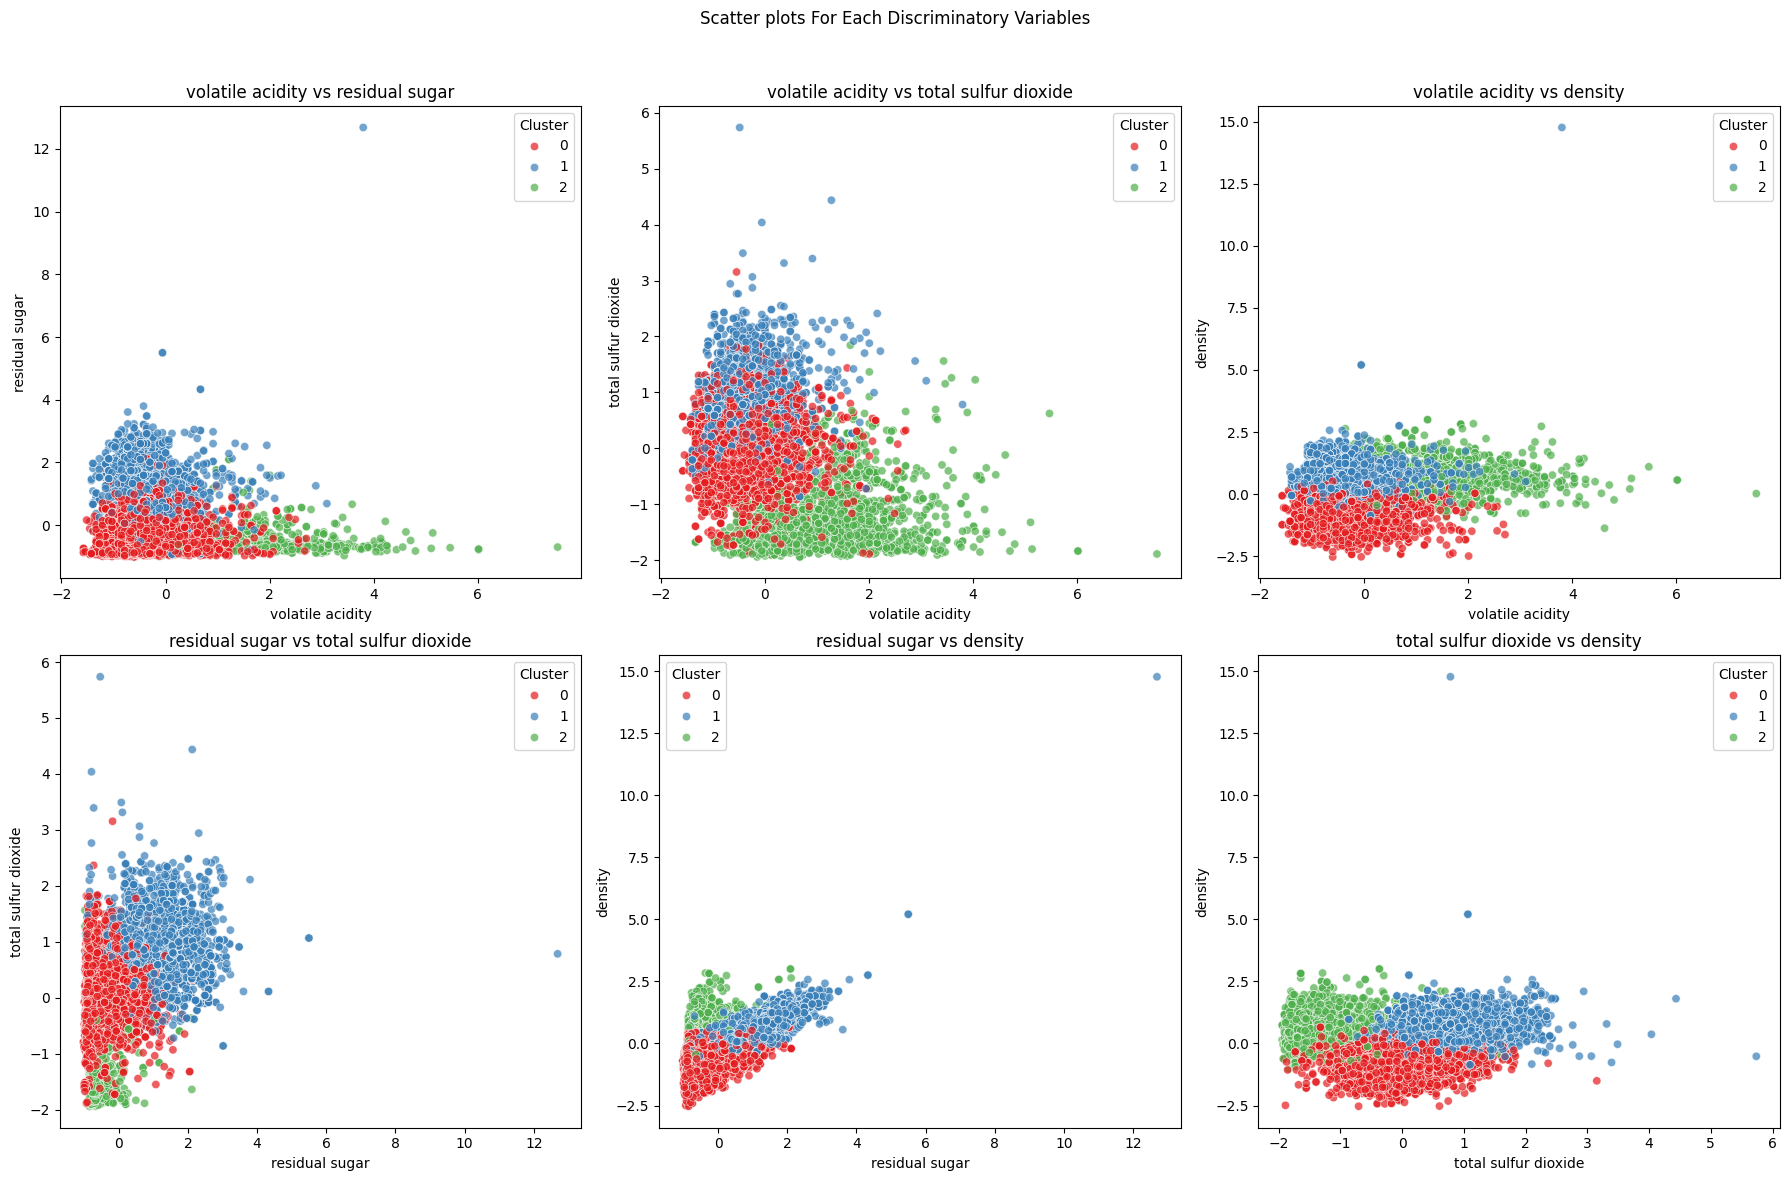

In [30]:
discriminatory_variables = ['volatile acidity', 'residual sugar', 'total sulfur dioxide', 'density']


plt.figure(figsize=(18, 12))
plot_number = 1

for i, var1 in enumerate(discriminatory_variables):
    for j, var2 in enumerate(discriminatory_variables):
        if i < j:  
            plt.subplot(2, 3, plot_number)
            sns.scatterplot(x=predictors_std[var1], y=predictors_std[var2], hue=predictors_std['Cluster'], palette="Set1", alpha=0.7)
            plt.title(f'{var1} vs {var2}')
            plt.xlabel(var1)
            plt.ylabel(var2)
            plot_number +=1

plt.suptitle("Scatter plots For Each Discriminatory Variables")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In all the plots, it is evident that at least one cluster type (0, 1, or 2) occupies a distinct range of values compared to the others. For example, when we examine the first plot, we observe that in terms of residual sugar levels, clusters 0 and 2 fall within similar ranges, while cluster 1 occupies a significantly higher range. Similarly, for volatile acidity values in the same plot, clusters 0 and 1 share a similar range, but cluster 2 stands out with notably higher values. These distinctions are consistently observable in the other plots as well, where the variables clearly differentiate the clusters, supporting the effectiveness of these features in the clustering process.

### Gaussian Mixture Model (GMM)

Gaussian Mixture Model is an algorithm for clustering that represents data as a combination of multiple Gaussian distributions, each having unique mean and variance. GMM, unlike K-means, does not assume spherical clusters with equal variance but allows for clusters of different shapes and sizes. In our wine dataset, GMM will group wines by their attributes such as acidity and alcohol content, by applying several Gaussian distributions to the data. Such adaptability allows GMM to better manage complex data patterns, resulting in a more precise depiction of the inherent clusters in wine characteristics.

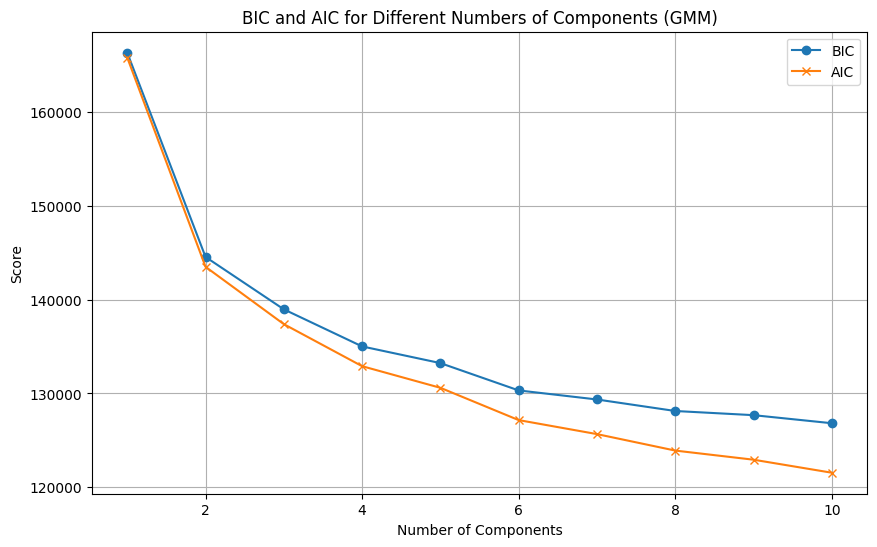

In [ ]:
bic_scores = []
aic_scores = []

for n_components in range(1, 11):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(predictors_std)
    bic_scores.append(gmm.bic(predictors_std))
    aic_scores.append(gmm.aic(predictors_std))


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), bic_scores, label='BIC', marker='o')
plt.plot(range(1, 11), aic_scores, label='AIC', marker='x')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('BIC and AIC for Different Numbers of Components (GMM)')
plt.legend()
plt.grid(True)
plt.show()

Based on our plot, it appears that both BIC and AIC decrease sharply after 2 components, then stabilize. Thus, 2 components would likely be optimal as both the BIC and AIC scores seem to level off at this point.

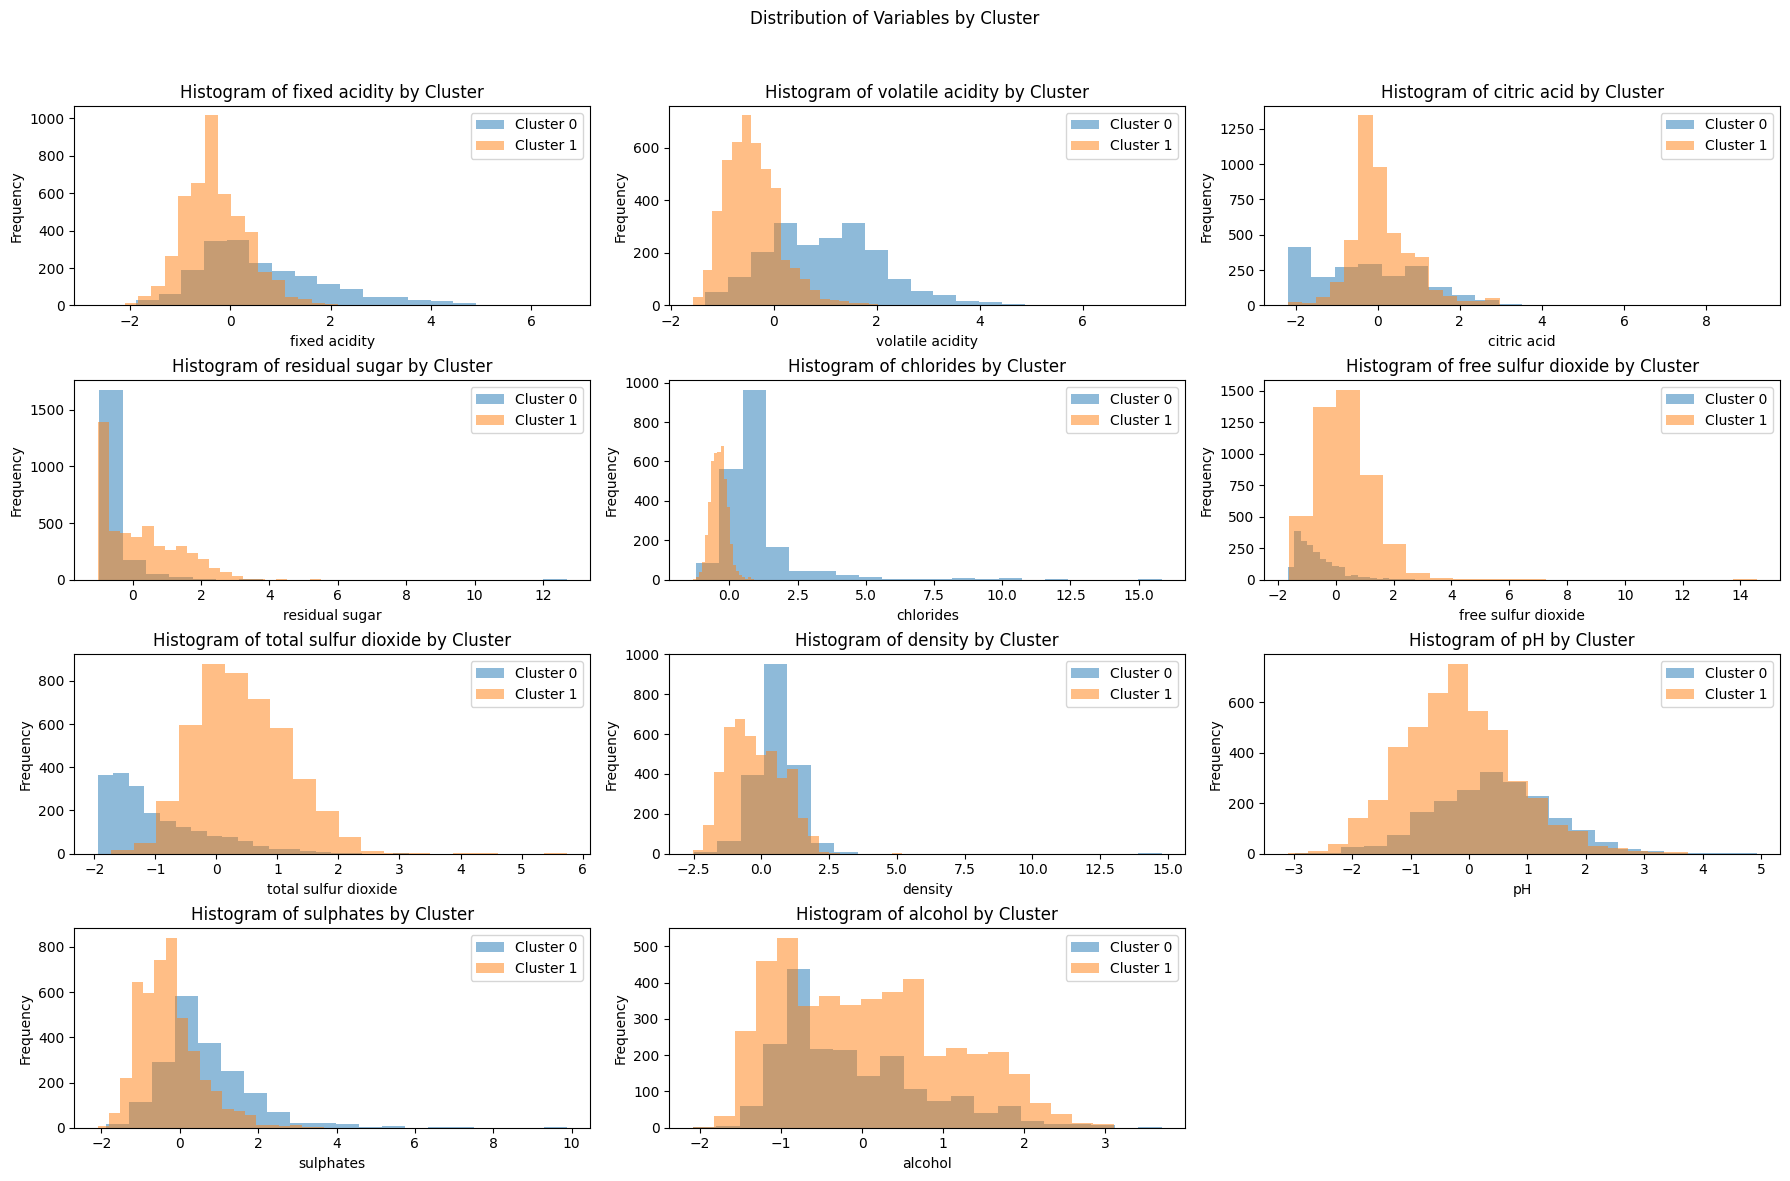

In [64]:
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(predictors_std)

clusters = gmm.predict(predictors_std)
predictors_std['Cluster'] = clusters

plt.figure(figsize=(18, 12))

for i,column in enumerate(predictors_std.columns[:-1]):
    plt.subplot(4,3,i+1)

    for cluster in range(2):
        plt.hist(predictors_std[predictors_std['Cluster'] == cluster][column], bins=20, alpha=0.5, label=f'Cluster {cluster}')
    
    plt.title(f'Histogram of {column} by Cluster')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("Distribution of Variables by Cluster")
plt.show()


The most discriminatory variables are volatile acidity, chlorides, free sulfur dioxide, and total sulfur dioxide. In the volatile acidity and chlorides variables, we can observe a clearer separation, and the other two variables we mentioned are quite close to these, but in general, apart from these four variables, there is considerable overlap in the other variables.

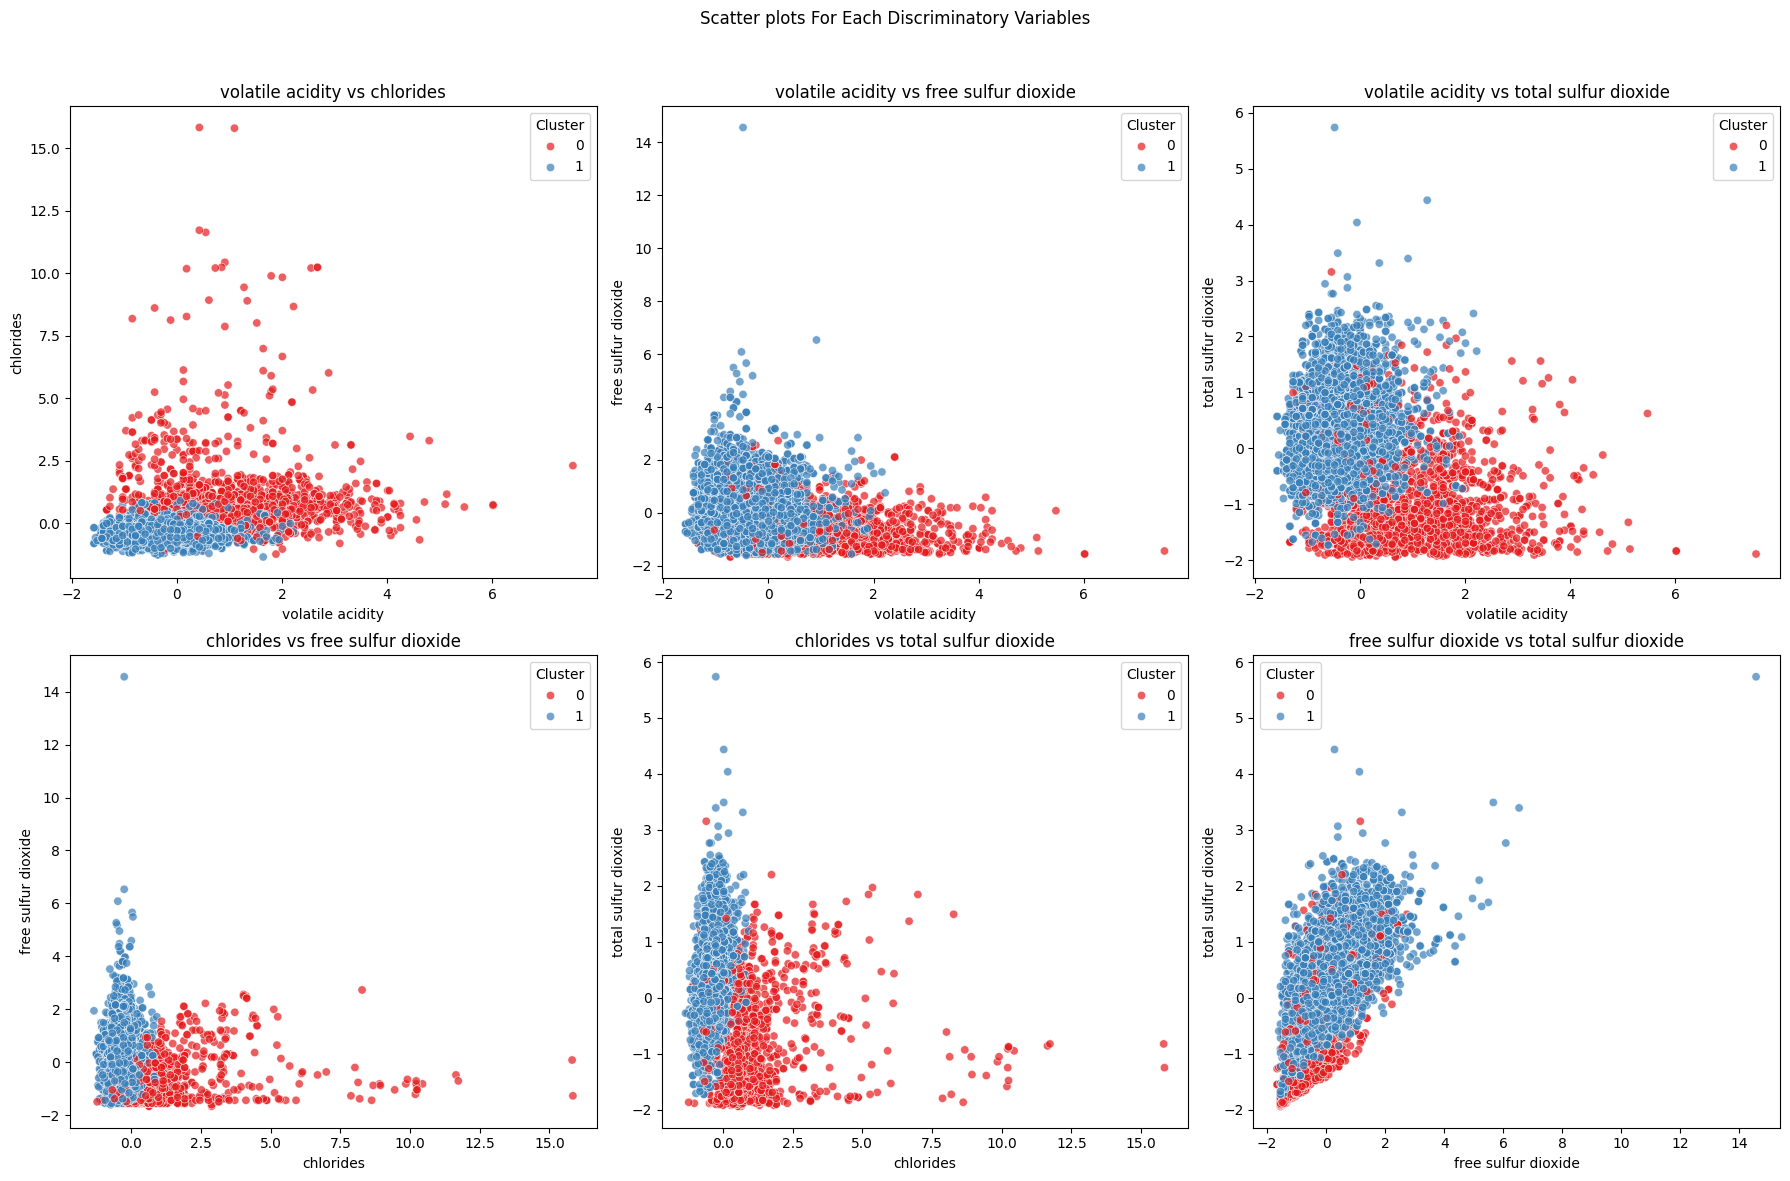

In [61]:
discriminatory_variables_gmm = ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide']


plt.figure(figsize=(18, 12))
plot_number = 1

for i, var1 in enumerate(discriminatory_variables_gmm):
    for j, var2 in enumerate(discriminatory_variables_gmm):
        if i < j:  
            plt.subplot(2, 3, plot_number)
            sns.scatterplot(x=predictors_std[var1], y=predictors_std[var2], hue=predictors_std['Cluster'], palette="Set1", alpha=0.7)
            plt.title(f'{var1} vs {var2}')
            plt.xlabel(var1)
            plt.ylabel(var2)
            plot_number +=1

plt.suptitle("Scatter plots For Each Discriminatory Variables")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

With the plots in the final section, we can observe how the two clusters are positioned apart from each other. As noted in our first histogram plot, although the separation can be observed across all variables, the distinction is clearer in the volatile acidity and chlorides variables compared to the others.

On the other hand, when comparing the Gaussian Mixture Model (GMM) algorithm to the K-means algorithm, while there is no huge performance gap, we can clearly say that GMM achieves a more distinct separation between clusters. Therefore, GMM seems to be more effective in capturing the underlying structure of the data, providing more meaningful cluster distinctions. This might suggest that GMM is better suited for this dataset when a finer level of clustering detail is required.